In [ ]:
pip install -U scikit-learn

In [ ]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/winequality-red.csv')
df.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1201,7.9,0.34,0.36,1.9,0.065,5.0,10.0,0.99419,3.27,0.54,11.2,7
1019,7.0,0.50,0.14,1.8,0.078,10.0,23.0,0.99636,3.53,0.61,10.4,5
213,8.2,0.57,0.26,2.2,0.060,28.0,65.0,0.99590,3.30,0.43,10.1,5
660,7.2,0.52,0.07,1.4,0.074,5.0,20.0,0.99730,3.32,0.81,9.6,6
576,9.9,0.50,0.24,2.3,0.103,6.0,14.0,0.99780,3.34,0.52,10.0,4


In [ ]:
df.shape

(1599, 12)

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# **Exploring the target column**

In [ ]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

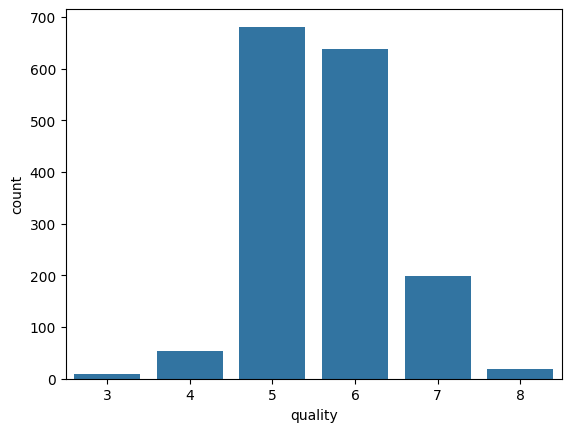

In [ ]:
sns.countplot(data=df,x='quality')

<Axes: xlabel='quality', ylabel='Count'>

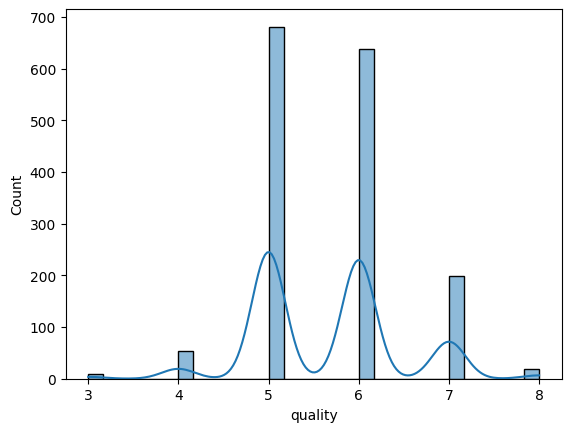

In [ ]:
sns.histplot(data=df,x='quality',kde=True)

<Axes: ylabel='quality'>

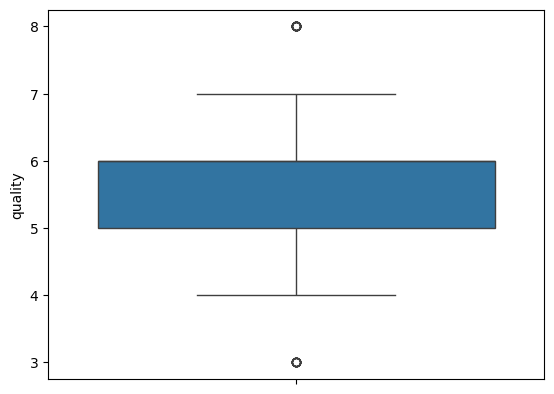

In [ ]:
sns.boxplot(data=df,y='quality')

# **Visualizing other columns with respect to the target column**

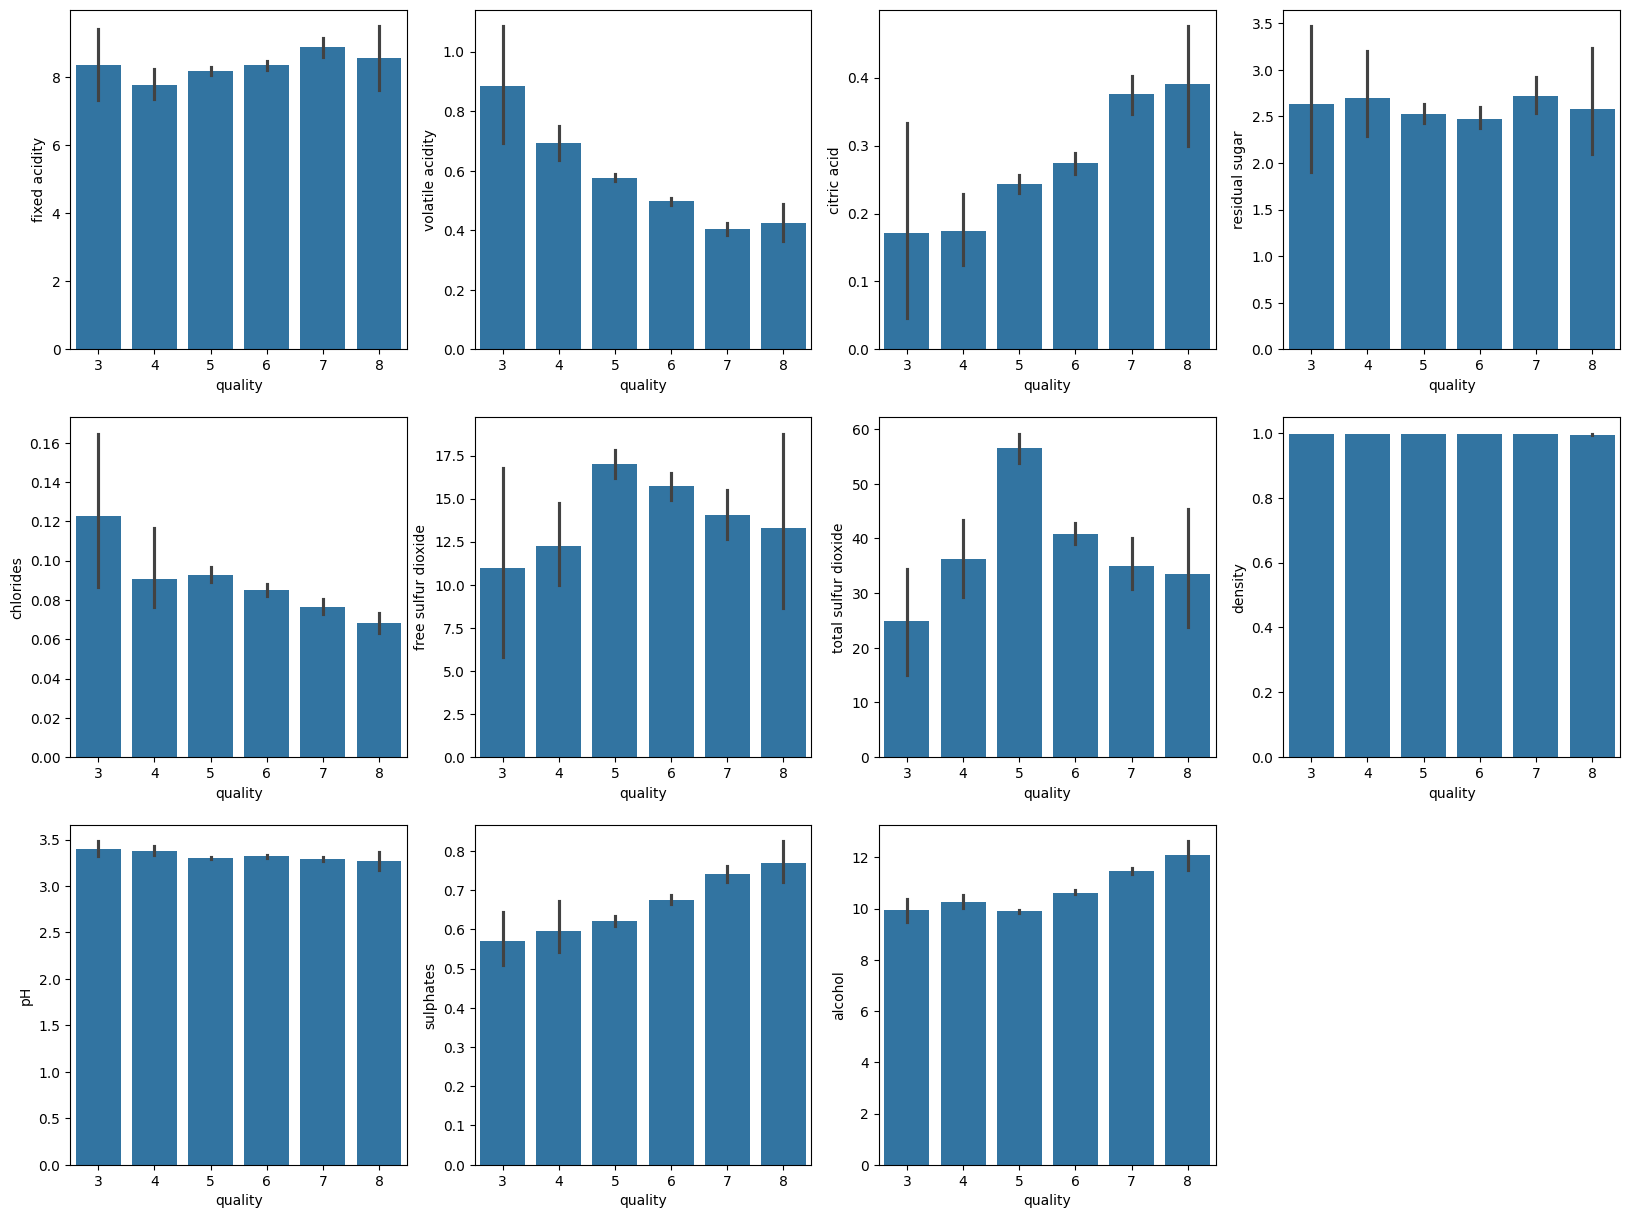

In [ ]:
input_cols = list(df.columns)[:11]
plt.figure(figsize=(20,15))
for i in range(0, len(input_cols)):
    plt.subplot(3, 4, i+1)
    ax = sns.barplot(x=df['quality'],y=df[input_cols[i]])

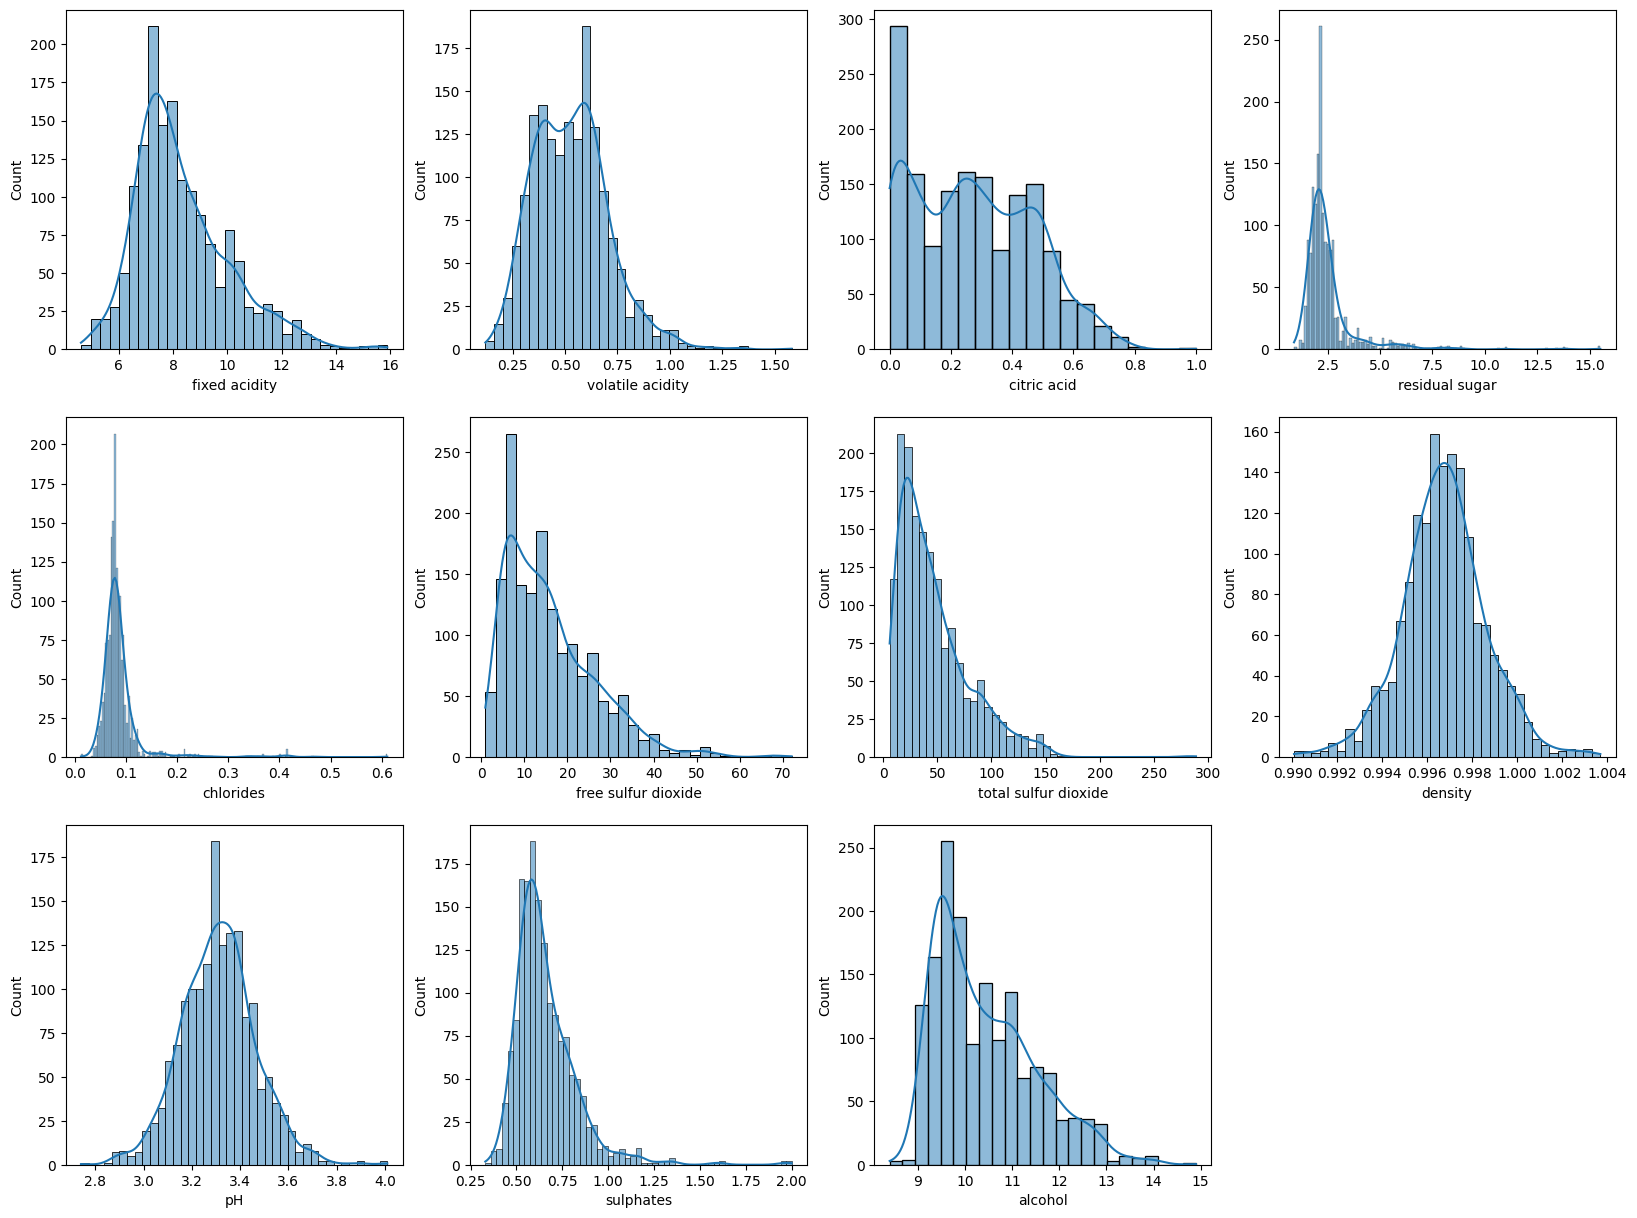

In [ ]:
plt.figure(figsize=(20,15))
for i in range(0, len(input_cols)):
    plt.subplot(3, 4, i+1)
    ax = sns.histplot(df[input_cols[i]],kde=True)

**Except 'density' and 'ph' all other columns are right skewed. We'll be using non linear models so skewness won't affect our result.**

<Axes: >

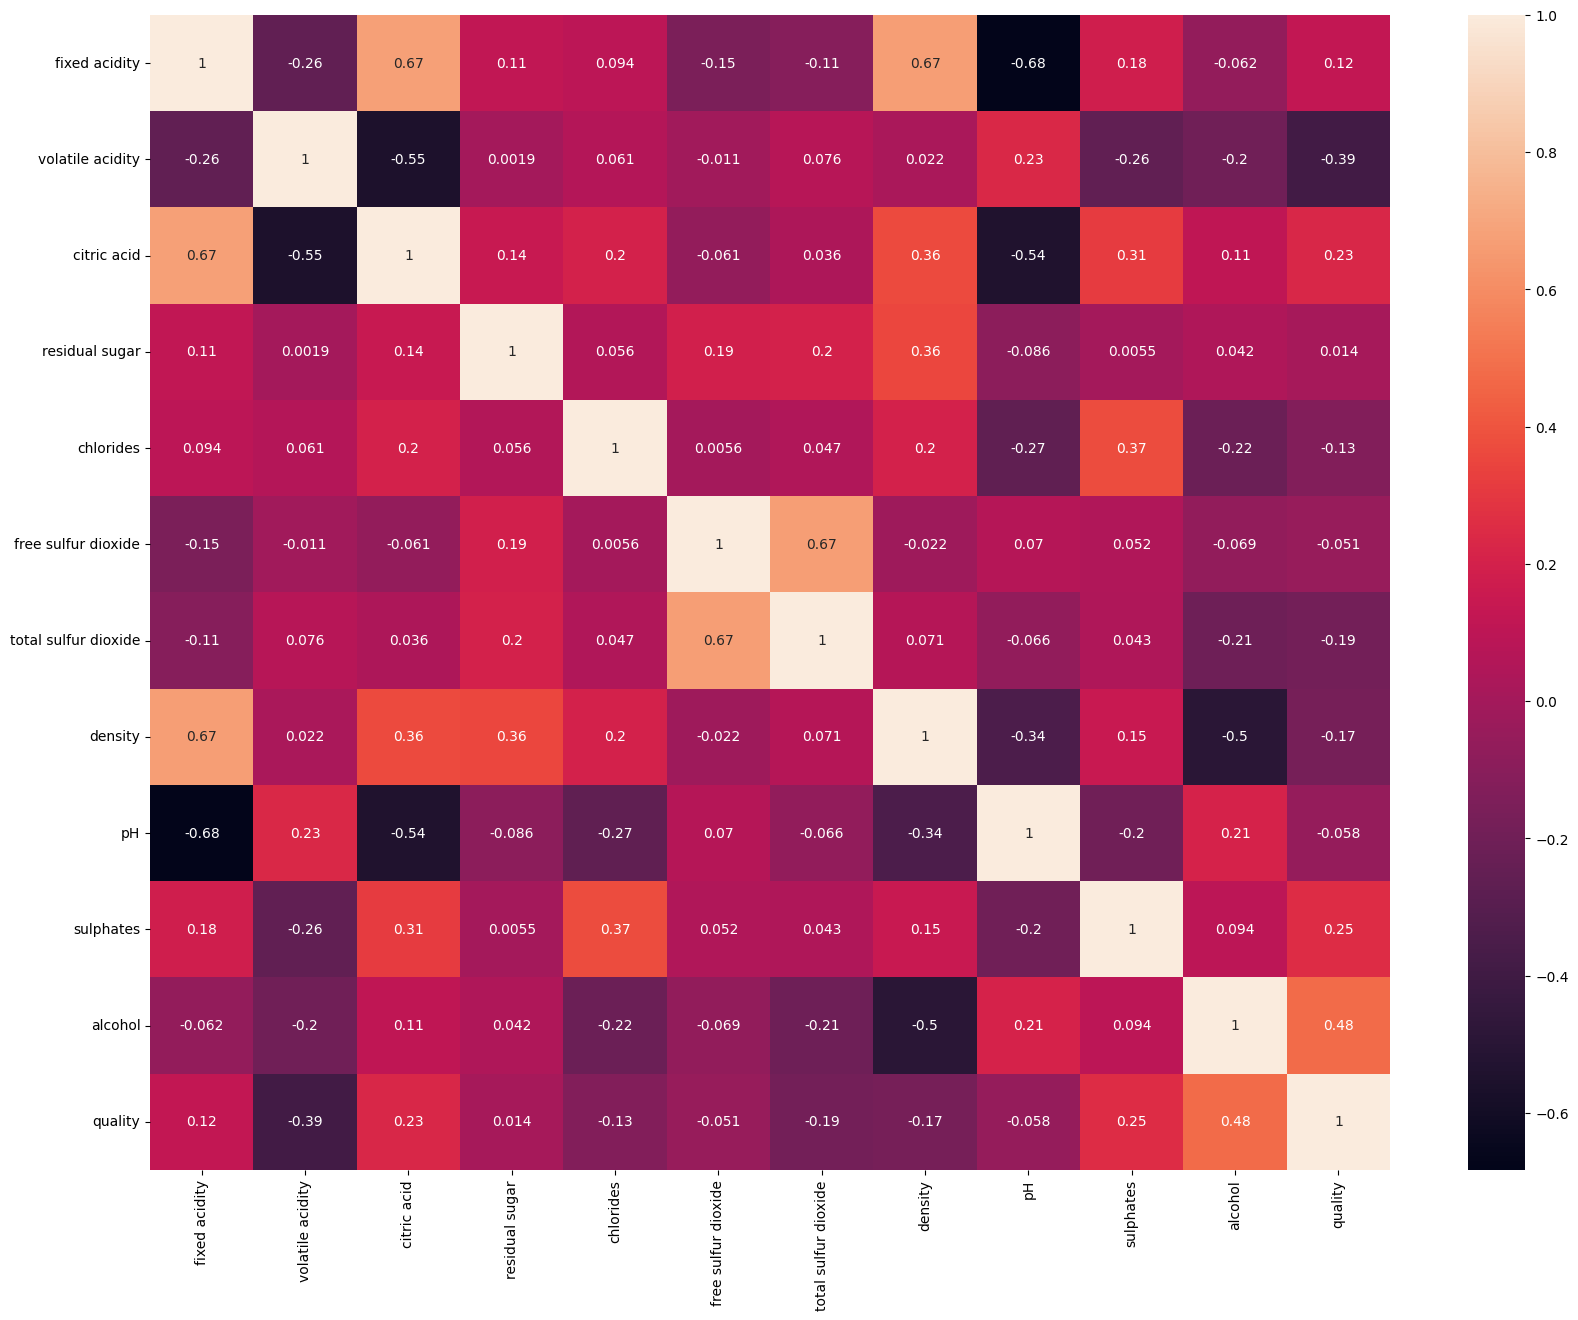

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

# **Engineering on the columns and making new column**

In [ ]:
df['quality'] = df['quality'].apply(lambda x : 1 if x>=7 else 0)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [ ]:
df['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

### **The dataset is imbalanced.**

In [ ]:
#Making new feature from two features
df['total acidity'] = df['fixed acidity'] + df['volatile acidity']
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,8.68
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,8.56
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,11.48
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,8.10


In [ ]:
#Removing unnecessary features
df = df.drop(['fixed acidity','volatile acidity','free sulfur dioxide'],axis=1)
df.head()

,citric acid,residual sugar,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,total acidity
0,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0,8.10
1,0.00,2.6,0.098,67.0,0.9968,3.20,0.68,9.8,0,8.68
2,0.04,2.3,0.092,54.0,0.9970,3.26,0.65,9.8,0,8.56
3,0.56,1.9,0.075,60.0,0.9980,3.16,0.58,9.8,0,11.48
4,0.00,1.9,0.076,34.0,0.9978,3.51,0.56,9.4,0,8.10


# **Preparing the model**

**Since the dataset is imbalanced so we'll apply balanced random forest classifier**

In [ ]:
#importing dependencies
from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
#Splitting our data into input and output
X = df.drop(['quality'],axis=1)
y = df['quality']

### **Training model without tuning any hyper-parameter**

In [ ]:
clf = BalancedRandomForestClassifier()
clf_score = cross_val_score(clf,X,y,cv=5)
np.average(clf_score)

0.7704898119122257

### **Let's try after doing standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
X_scaled = scale.fit_transform(X)
X_scaled

array([[-1.39147228, -0.45321841, -0.24370669, ..., -0.57920652,
        -0.96024611, -0.43877408],
       [-1.39147228,  0.04341614,  0.2238752 , ...,  0.1289504 ,
        -0.58477711, -0.09830139],
       [-1.18607043, -0.16942723,  0.09635286, ..., -0.04808883,
        -0.58477711, -0.16874401],
       ...,
       [-0.72391627, -0.16942723, -0.24370669, ...,  0.54204194,
         0.54162988, -1.19603231],
       [-0.77526673, -0.38227061, -0.26496041, ...,  0.30598963,
        -0.20930812, -1.35159311],
       [ 1.02199944,  0.75289408, -0.43499018, ...,  0.01092425,
         0.54162988, -1.48954326]])

In [ ]:
#cross_val score
scaled_clf_score = cross_val_score(clf,X_scaled,y,cv=5)
np.average(scaled_clf_score)

0.7592221786833855

**There is almost no difference before and after scaling. So no need to scale**

**We'll be tuning our  model for deployment**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
clf = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, random_state=0,bootstrap=False)
model_params = {
            'n_estimators' : [40,50,100,150,200],
            'criterion' : ['gini', 'entropy'],
            'max_depth' : [5,6,7],
            'n_jobs' : [-1]
}

In [ ]:
grid = GridSearchCV(clf,param_grid=model_params,cv=5,return_train_score=False)
grid.fit(X,y)

GridSearchCV(cv=5,
             estimator=BalancedRandomForestClassifier(bootstrap=False,
                                                      random_state=0,
                                                      replacement=True,
                                                      sampling_strategy='all'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7],
                         'n_estimators': [40, 50, 100, 150, 200],
                         'n_jobs': [-1]})

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50, 'n_jobs': -1}

In [ ]:
grid.best_score_

0.8017692006269591

### **Now we'll finalize our model  with the resulted hyperparameters.**:

In [ ]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
model = BalancedRandomForestClassifier(sampling_strategy="all", replacement=True, random_state=0,bootstrap=False,
                                       criterion = 'gini', max_depth= 7, n_estimators= 50, n_jobs= -1)

In [ ]:
#Training our model
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [ ]:
#Test accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.853125

In [ ]:
#Training accuracy
y_pred_train = model.predict(X_train)
accuracy_score(y_pred_train,y_train)

0.8655199374511336

**AS we can see there is no case of overfitting since train and test accuracy does not differ by a higher margin**

In [ ]:
#Viewing precision, recall and f1 score
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       273
           1       0.50      0.94      0.65        47

    accuracy                           0.85       320
   macro avg       0.74      0.89      0.78       320
weighted avg       0.92      0.85      0.87       320

